# HW_10 by Andrew Lee

## Please create at least 2 well formatted exploratory visualizations for each of the following potential areas of analysis:
- Capacity planning: Data analysis can be used to analyze data on factors such as passenger demand, travel
patterns, and the availability of rolling stock (e.g. trains, cars, and locomotives). This can help Amtrak plan its
capacity more effectively and ensure that it has the right amount of capacity to meet demand.
- Asset management: Data analysis can be used to analyze data on the performance and maintenance of
Amtrak's assets, such as its rolling stock and infrastructure. This can help Amtrak optimize the maintenance
and repair of its assets, reduce downtime, and improve the overall performance of its operations.
- Customer experience: Data analysis can be used to analyze data on customer satisfaction, such as survey
results and feedback, to identify areas for improvement in the customer experience. This can help Amtrak tailor
its services to better meet the needs and preferences of its customers.

In [ ]:
# import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('datasets_applied_business_analytics - job_satisfaction.csv.csv')
# data processing
#Encoding Categorical Values
ord_enc = OrdinalEncoder()
df["country_code"] = ord_enc.fit_transform(df[["country"]])
df["age_code"] = ord_enc.fit_transform(df[["age"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["ethnicity_code"] = ord_enc.fit_transform(df[["ethnicity"]])
df.head()

,satisfaction,important_recognitionAchievements,satisfied_careerAdvance,satisfied_recognitionAchievements,age,gender,ethnicity,country,country_code,age_code,gender_code,ethnicity_code
0,5,Extremely important,5,5,51-60 years,Male,Asian,India,28.0,5.0,3.0,0.0
1,5,Extremely important,5,5,61-70 years,Male,White,United States,76.0,6.0,3.0,7.0
2,4,Extremely important,5,5,41-50 years,Female,I’d prefer not to say,Egypt,18.0,4.0,0.0,4.0
3,2,Extremely important,4,2,41-50 years,Male,Asian,India,28.0,4.0,3.0,0.0
4,5,Extremely important,4,5,31-40 years,Male,Asian,Saudi Arabia,58.0,3.0,3.0,0.0
5,4,Extremely important,1,2,41-50 years,Male,Asian,Iraq,31.0,4.0,3.0,0.0
6,4,Extremely important,4,4,22-25 years,Male,White,Sweden,67.0,1.0,3.0,7.0
7,2,Extremely important,1,4,41-50 years,Female,I prefer to self-describe,Morocco,44.0,4.0,0.0,3.0
8,2,Extremely important,1,4,41-50 years,Male,Asian,Canada,8.0,4.0,3.0,0.0
9,5,Extremely important,5,5,41-50 years,Female,White,Germany,22.0,4.0,0.0,7.0


### How does age impact job satisfaction scores among employees?


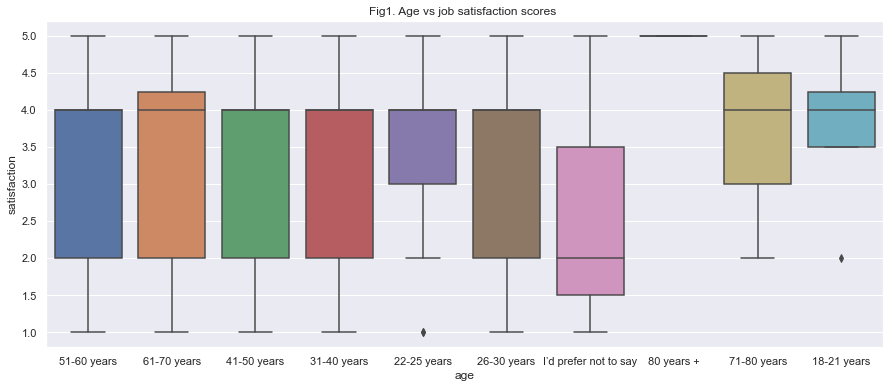

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df['age'],
            y = df['satisfaction'])
plt.xlabel('age')
plt.ylabel('satisfaction')
plt.title('Fig1. Age vs job satisfaction scores ')
plt.show()

From above fig 1, people who at 71-80 years and 18-21 years have higher job satisfaction score range comparing to the others. The boxes and the range are higher than the others. It seems like people who at 71-80 years and 18-21 years would have higher job satisfaction score.

### Is there a significant difference in job satisfaction scores between male and female employees?


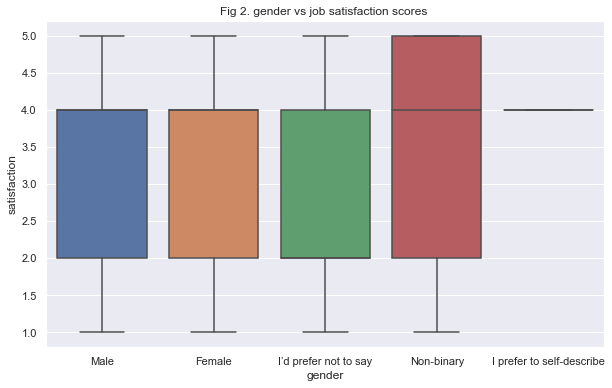

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['gender'],
            y = df['satisfaction'])
plt.xlabel('gender')
plt.ylabel('satisfaction')
plt.title('Fig 2. gender vs job satisfaction scores ')
plt.show()

Base on Fig2, there is no significant difference between the male and female employee. Both boxes are on the same position and range. 

### How does ethnicity impact job satisfaction scores among employees?

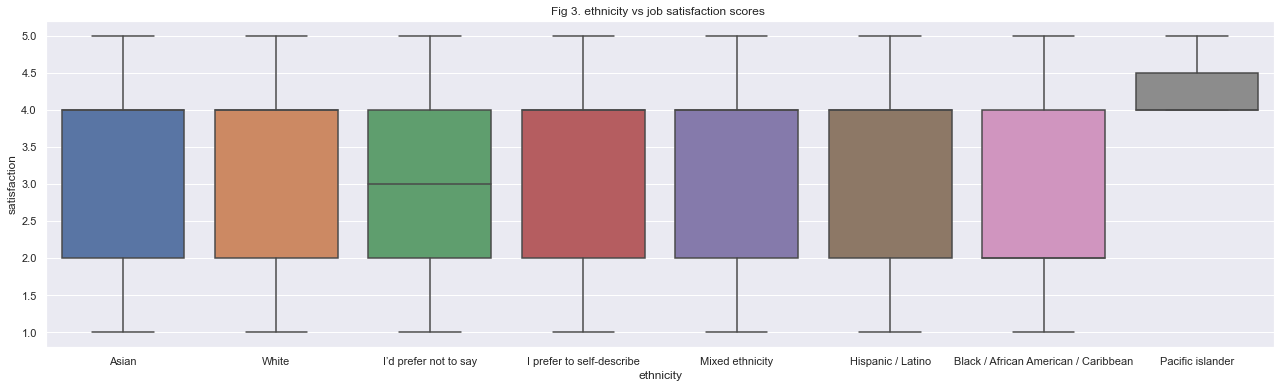

In [ ]:
plt.figure(figsize=(22,6))
sns.boxplot(x = df['ethnicity'],
            y = df['satisfaction'])
plt.xlabel('ethnicity')
plt.ylabel('satisfaction')
plt.title('Fig 3. ethnicity vs job satisfaction scores ')
plt.show()

Base on Fig3, Most of the ethnicity doesn't have obvious impact to job satisfaction scores among employee except Pacific islander. The box of the Pacific islander is above other ethnicity's boxes. This shows pacific islander general have higher satisfaction scores than others. 

### How does country of origin influence job satisfaction scores among employees?


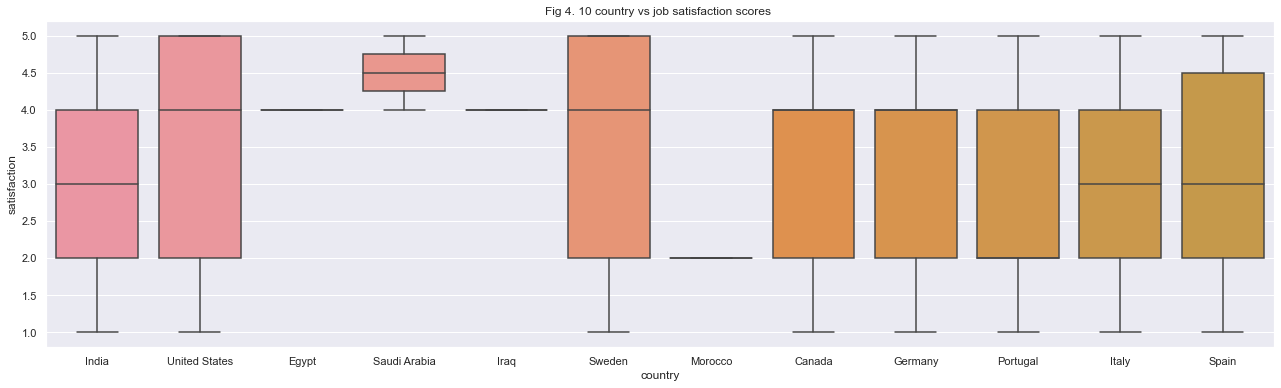

In [ ]:
num_country = len(df['country'].unique())
country_index = np.arange(num_country)
plt.figure(figsize=(22,6))
sns.boxplot(x = df['country'],
            y = df['satisfaction'])
plt.xlabel('country')
plt.ylabel('satisfaction')
plt.title('Fig 4. 10 country vs job satisfaction scores ')
plt.xlim(-0.5,11.5)
plt.show()

Beacuse there are too many country in the data, Fig. 4 only shows 10 of the country in the data. Base on Fig4, it is obvious to see some country's box have different positions and range. That means the country of orgin have different impact to job satisfaction scores.

# Is there an interaction effect between age and gender on job satisfaction scores?


array([[<AxesSubplot: xlabel='age_code', ylabel='age_code'>,
        <AxesSubplot: xlabel='gender_code', ylabel='age_code'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='age_code'>],
       [<AxesSubplot: xlabel='age_code', ylabel='gender_code'>,
        <AxesSubplot: xlabel='gender_code', ylabel='gender_code'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='gender_code'>],
       [<AxesSubplot: xlabel='age_code', ylabel='satisfaction'>,
        <AxesSubplot: xlabel='gender_code', ylabel='satisfaction'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='satisfaction'>]],
      dtype=object)

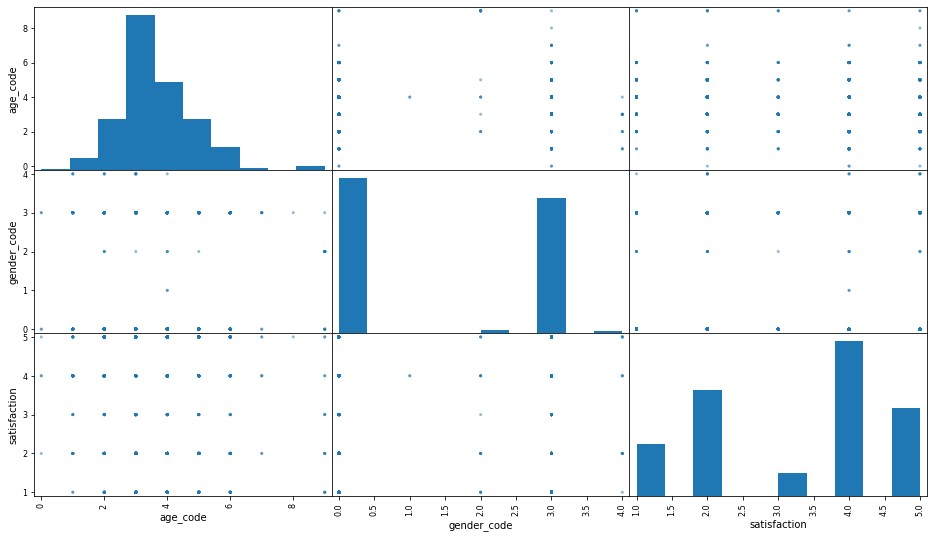

In [ ]:
pd.plotting.scatter_matrix(df[['age_code', 'gender_code', 'satisfaction']],figsize=(16,9))

# Is there an interaction effect between ethnicity and country on job satisfaction scores?


array([[<AxesSubplot: xlabel='ethnicity_code', ylabel='ethnicity_code'>,
        <AxesSubplot: xlabel='country_code', ylabel='ethnicity_code'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='ethnicity_code'>],
       [<AxesSubplot: xlabel='ethnicity_code', ylabel='country_code'>,
        <AxesSubplot: xlabel='country_code', ylabel='country_code'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='country_code'>],
       [<AxesSubplot: xlabel='ethnicity_code', ylabel='satisfaction'>,
        <AxesSubplot: xlabel='country_code', ylabel='satisfaction'>,
        <AxesSubplot: xlabel='satisfaction', ylabel='satisfaction'>]],
      dtype=object)

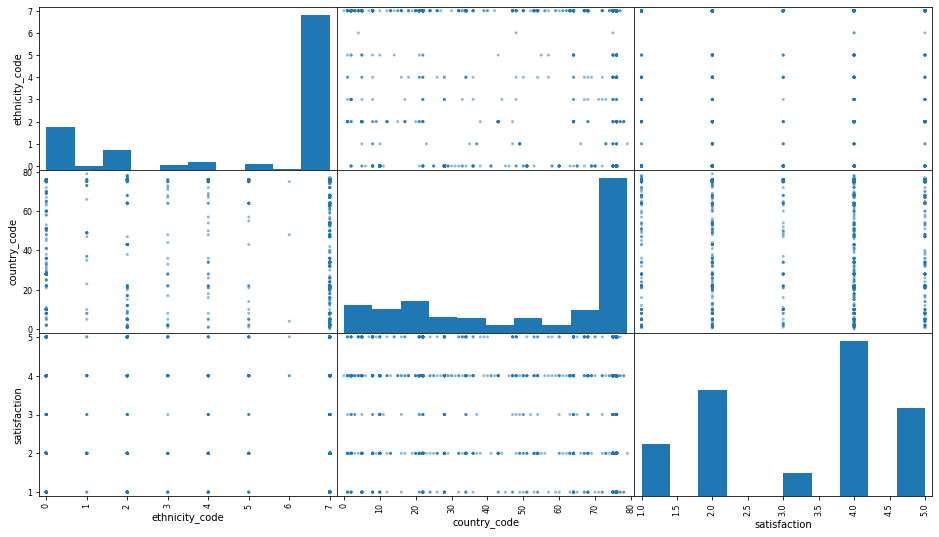

In [ ]:
pd.plotting.scatter_matrix(df[['ethnicity_code', 'country_code', 'satisfaction']],figsize=(16,9))

### Do certain age groups have higher job satisfaction scores than others based on gender, ethnicity, and country?


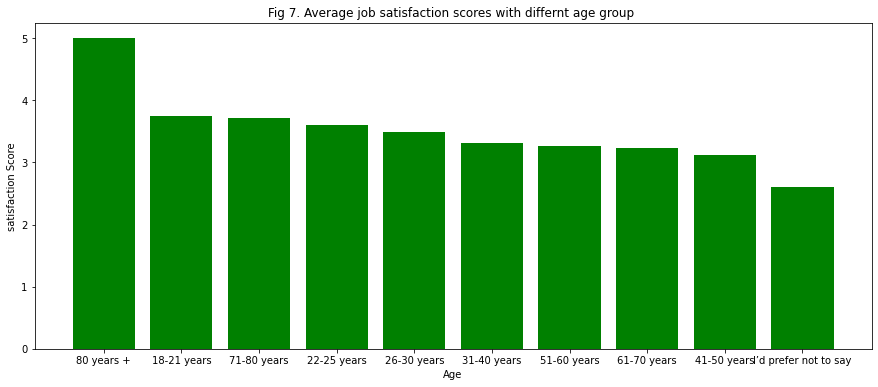

In [ ]:
plt.figure(figsize=(15,6))
df2 = df.groupby('age').mean()
df2 = df2.sort_values("satisfaction",ascending=False)
df2
plt.bar(df2.index,df2['satisfaction'],color="green")
plt.xlabel('Age')
plt.ylabel('satisfaction Score')
plt.title('Fig 7. Average job satisfaction scores with differnt age group ')
plt.show()

Base on Fig 7, we can see 80 years and 19-21 years age group have higher job satisfaction scores than the others.

In [ ]:
# g = sns.barplot(x="age", y="satisfaction", hue='gender', data=df)
# sns.set(rc={'figure.figsize':(25,8)})

### Do certain ethnic groups have higher job satisfaction scores than others based on age, gender, and country?


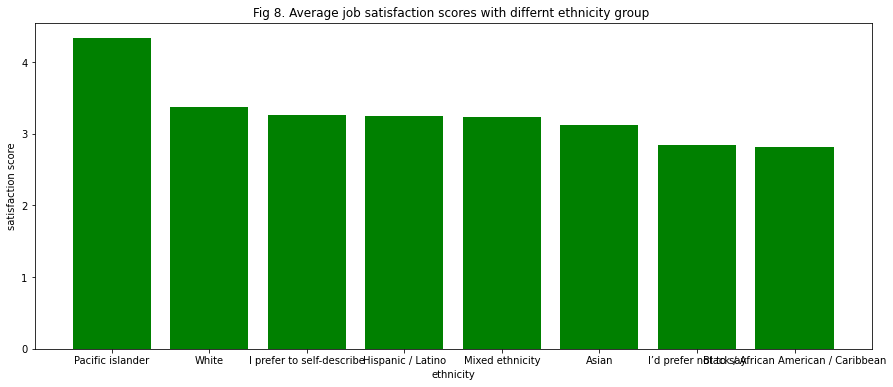

In [ ]:
plt.figure(figsize=(15,6))
df2 = df.groupby('ethnicity').mean()
df2 = df2.sort_values("satisfaction",ascending=False)

plt.bar(df2.index,df2['satisfaction'],color="green")
plt.xlabel('ethnicity')
plt.ylabel('satisfaction score')
plt.title('Fig 8. Average job satisfaction scores with differnt ethnicity group ')
plt.show()

Base on Fig 8, we can see Pacific islander have higher job satisfaction scores than the others.

In [ ]:
# df3 = df.groupby(['satisfaction','ethnicity']).count()
# df3 = df3.drop(columns=['important_recognitionAchievements','satisfied_careerAdvance','satisfied_recognitionAchievements','age','gender'])
# df3.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(22, 25), layout=(5, 1),sharex=False, sharey=False)

### Do certain countries have higher job satisfaction scores than others based on age, gender, and ethnicity?


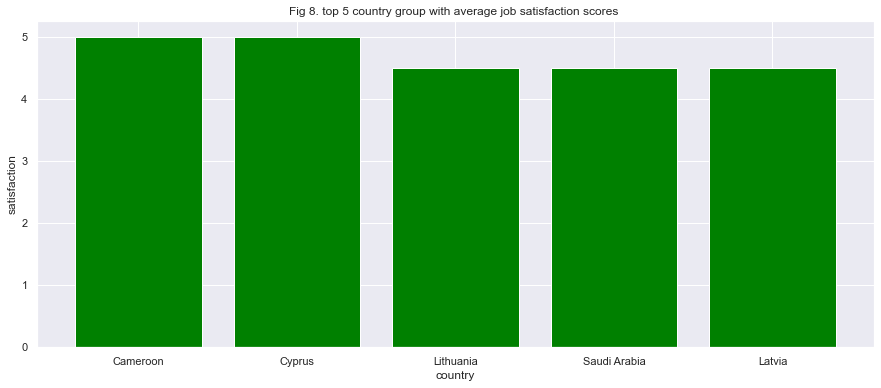

In [ ]:
plt.figure(figsize=(15,6))
df2 = df.groupby('country').mean()
df2 = df2.sort_values("satisfaction",ascending=False).head(5)

plt.bar(df2.index,df2['satisfaction'],color="green")
plt.xlabel('country')
plt.ylabel('satisfaction')
plt.title('Fig 8. top 5 country group with average job satisfaction scores ')
plt.show()

Base on Fig 8, Cameroon, Cyprus, Lithuania, Saudi Arabia, and Latvia have higher average satisfaction scores than others.

# Is there a difference in job satisfaction scores among employees from different countries within specific age and ethnicity groups?



In [ ]:
df2

,satisfaction,important_recognitionAchievements,satisfied_careerAdvance,satisfied_recognitionAchievements,age,gender,ethnicity,country
0,5,Extremely important,5,5,51-60 years,Male,Asian,India
1,5,Extremely important,5,5,61-70 years,Male,White,United States
2,4,Extremely important,5,5,41-50 years,Female,I’d prefer not to say,Egypt
3,2,Extremely important,4,2,41-50 years,Male,Asian,India
4,5,Extremely important,4,5,31-40 years,Male,Asian,Saudi Arabia
...,...,...,...,...,...,...,...,...
1653,4,Somewhat important,2,2,51-60 years,Female,White,Finland
1654,4,Somewhat important,4,4,51-60 years,Male,Hispanic / Latino,Mexico
1655,4,Somewhat important,2,4,61-70 years,Male,Hispanic / Latino,Argentina
1656,5,Somewhat important,5,4,31-40 years,Female,White,United States


------------

Is there a statistically significant difference in job satisfaction scores between employees of different ages?


In [ ]:
from statsmodels.formula.api import ols
model1 = ols('satisfaction ~ age_code', data=df).fit()
print(model1.summary())

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in satisfaction score by age.")
else:
    print("There is no significant difference between the means in satisfaction score by age.")

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.691
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00324
Time:                        22:06:58   Log-Likelihood:                -2861.2
No. Observations:                1658   AIC:                             5726.
Df Residuals:                    1656   BIC:                             5737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5523      0.097     36.503      0.0

Is there a statistically significant difference in job satisfaction scores between male and female employees?


In [ ]:
from statsmodels.formula.api import ols
model1 = ols('satisfaction ~ gender_code', data=df).fit()
print(model1.summary())

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in satisfaction score by gender.")
else:
    print("There is no significant difference between the means in satisfaction score by gender.")

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6033
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.437
Time:                        22:08:33   Log-Likelihood:                -2865.3
No. Observations:                1658   AIC:                             5735.
Df Residuals:                    1656   BIC:                             5745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2582      0.046     70.631      

Is there a statistically significant difference in job satisfaction scores between employees of different
ethnicities?


In [ ]:
from statsmodels.formula.api import ols
model1 = ols('satisfaction ~ ethnicity_code', data=df).fit()
print(model1.summary())

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in satisfaction score by ethnicity.")
else:
    print("There is no significant difference between the means in satisfaction score by ethnicity.")

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.88
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           0.000991
Time:                        22:09:14   Log-Likelihood:                -2860.1
No. Observations:                1658   AIC:                             5724.
Df Residuals:                    1656   BIC:                             5735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0891      0.068     45.

Is there a statistically significant difference in job satisfaction scores between employees from different
countries?

In [ ]:
from statsmodels.formula.api import ols
model1 = ols('satisfaction ~ country_code', data=df).fit()
print(model1.summary())

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in satisfaction score by ethnicity.")
else:
    print("There is no significant difference between the means in satisfaction score by ethnicity.")

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4351
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.510
Time:                        22:09:40   Log-Likelihood:                -2865.3
No. Observations:                1658   AIC:                             5735.
Df Residuals:                    1656   BIC:                             5746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2414      0.071     45.508   

Is there a statistically significant interaction effect between age and gender on job satisfaction scores?


Is there a statistically significant interaction effect between ethnicity and country on job satisfaction scores?


Is there a statistically significant difference in job satisfaction scores between different age and gender groups?


Is there a statistically significant difference in job satisfaction scores between different ethnic and country
groups?

Is there a statistically significant difference in job satisfaction scores between employees of different ages,
ethnicities, and countries?

Can a logistic regression model be developed to predict job satisfaction scores based on age, gender, ethnicity,
and country?

What is the significance of each predictor in the logistic regression model for job satisfaction scores?

Is there a significant relationship between age and job satisfaction scores?


Is there a significant relationship between gender and job satisfaction scores?


In [ ]:
from scipy.stats import pearsonr
x= df["gender"]
y= df["satisfaction"]
plt.scatter(x,y)
plt.show()

Is there a significant relationship between ethnicity and job satisfaction scores?


Is there a significant relationship between country and job satisfaction scores?


What is the strength and direction of the relationship between age and job satisfaction scores?


What is the strength and direction of the relationship between gender and job satisfaction scores?


What is the strength and direction of the relationship between ethnicity and job satisfaction scores?

What is the strength and direction of the relationship between country and job satisfaction scores?
